In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import date

In [2]:
start = '2010-01-01'
end = date.today().strftime("%Y-%m-%d")

df = yf.download('^GSPC', start=start, end=end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-14,5424.080078,5432.390137,5403.750000,5431.600098,5431.600098,3438650000
2024-06-17,5431.109863,5488.500000,5420.399902,5473.229980,5473.229980,3447840000
2024-06-18,5476.149902,5490.379883,5471.319824,5487.029785,5487.029785,3544330000
2024-06-20,5499.990234,5505.529785,5455.560059,5473.169922,5473.169922,3847060000
2024-06-21,5466.770020,5478.310059,5452.029785,5464.620117,5464.620117,6773800000


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,1116.560059,1133.869995,1116.560059,1132.989990,1132.989990,3991400000
1,2010-01-05,1132.660034,1136.630005,1129.660034,1136.520020,1136.520020,2491020000
2,2010-01-06,1135.709961,1139.189941,1133.949951,1137.140015,1137.140015,4972660000
3,2010-01-07,1136.270020,1142.459961,1131.319946,1141.689941,1141.689941,5270680000
4,2010-01-08,1140.520020,1145.390015,1136.219971,1144.979980,1144.979980,4389590000


In [5]:
df = df.drop(['Date', 'Adj Close'], axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1116.560059,1133.869995,1116.560059,1132.989990,3991400000
1,1132.660034,1136.630005,1129.660034,1136.520020,2491020000
2,1135.709961,1139.189941,1133.949951,1137.140015,4972660000
3,1136.270020,1142.459961,1131.319946,1141.689941,5270680000
4,1140.520020,1145.390015,1136.219971,1144.979980,4389590000


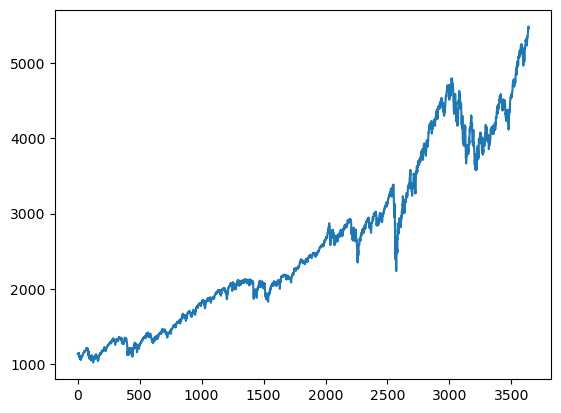

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3636    5143.039097
3637    5149.085898
3638    5155.014595
3639    5160.836592
3640    5166.203491
Name: Close, Length: 3641, dtype: float64

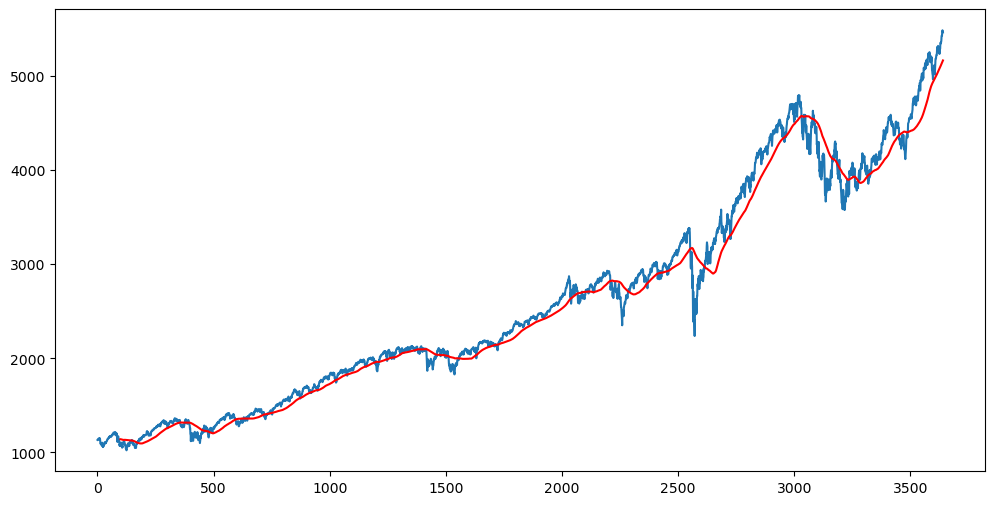

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0               NaN
1               NaN
2               NaN
3               NaN
4               NaN
           ...     
3636    4821.698057
3637    4826.489856
3638    4831.386704
3639    4836.173704
3640    4841.012654
Name: Close, Length: 3641, dtype: float64

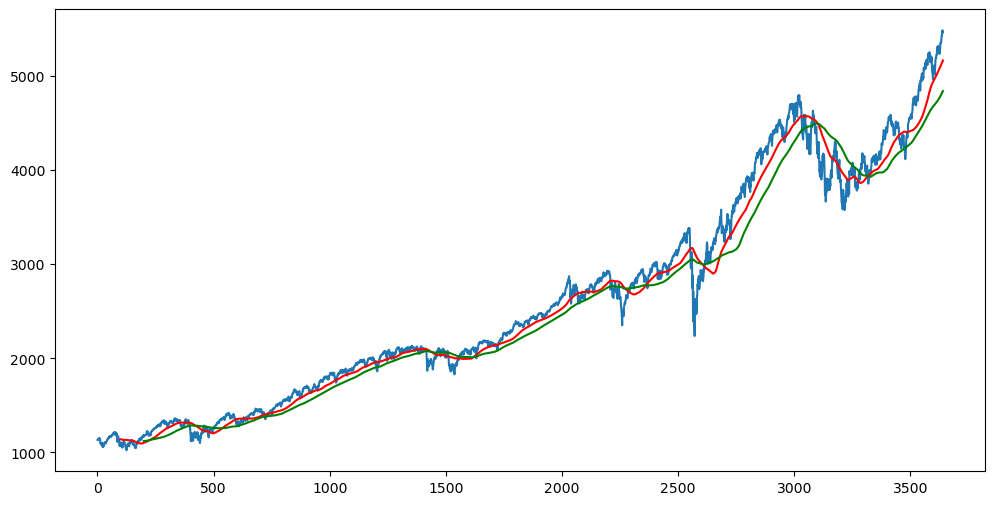

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [11]:
# Chia tập dữ liệu thành training_set và testing_set
n1 = int(len(df)*0.70)
n2 = int(len(df)*0.15)

data_training = pd.DataFrame(df['Close'][0:n1])
data_validating = pd.DataFrame(df['Close'][n1:(n1+n2)])
data_testing = pd.DataFrame(df['Close'][(n1+n2):])

print(data_training.shape)
print(data_validating.shape)
print(data_testing.shape)


(2548, 1)
(546, 1)
(547, 1)


In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [13]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04683191],
       [0.04832922],
       [0.0485922 ],
       ...,
       [0.99736171],
       [1.        ],
       [0.99581356]])

In [14]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)    

In [15]:
x_train.shape

(2448, 100, 1)

In [16]:
days = data_training.tail(100)
data_validating = pd.concat([days, data_validating], ignore_index=True)

In [17]:
data_valiadating_array = scaler.fit_transform(data_validating)
data_valiadating_array

array([[0.29207637],
       [0.28924341],
       [0.28305776],
       [0.2888995 ],
       [0.27464092],
       [0.25407171],
       [0.26306676],
       [0.27923618],
       [0.27407043],
       [0.2562013 ],
       [0.26649368],
       [0.27381248],
       [0.28637134],
       [0.28476139],
       [0.29630034],
       [0.29395973],
       [0.29718736],
       [0.29259601],
       [0.30061427],
       [0.2964215 ],
       [0.29975463],
       [0.30200929],
       [0.30679993],
       [0.31339188],
       [0.31240327],
       [0.31626396],
       [0.31266514],
       [0.32413368],
       [0.32857268],
       [0.32714647],
       [0.32799046],
       [0.33127275],
       [0.33435976],
       [0.33198786],
       [0.33387523],
       [0.33473487],
       [0.33574686],
       [0.34505854],
       [0.34567205],
       [0.34494911],
       [0.3403695 ],
       [0.33844702],
       [0.34108461],
       [0.35020864],
       [0.35289707],
       [0.35801979],
       [0.3530768 ],
       [0.342

In [18]:
x_val = []
y_val = []

for i in range(100, data_valiadating_array.shape[0]):
    x_val.append(data_valiadating_array[i-100:i])
    y_val.append(data_valiadating_array[i, 0])

x_val, y_val = np.array(x_val), np.array(y_val)    

In [19]:
x_val.shape

(546, 100, 1)

In [20]:
# Model
from keras.layers import Dense, LSTM, Bidirectional
from keras.models import Sequential

model = Sequential()
model.add(Bidirectional(LSTM(units=50, input_shape=(x_train.shape[1], 1))))
model.add(Dense(units=1))

model.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_absolute_error'])

c:\Users\AD\miniconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=100)

Epoch 1/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0348 - mean_absolute_error: 0.1183 - val_loss: 0.0063 - val_mean_absolute_error: 0.0685
Epoch 2/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.5899e-04 - mean_absolute_error: 0.0195 - val_loss: 0.0049 - val_mean_absolute_error: 0.0597
Epoch 3/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.9153e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0044 - val_mean_absolute_error: 0.0561
Epoch 4/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 5.0084e-04 - mean_absolute_error: 0.0169 - val_loss: 0.0033 - val_mean_absolute_error: 0.0464
Epoch 5/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 4.3320e-04 - mean_absolute_error: 0.0156 - val_loss: 0.0030 - val_mean_absolute_error: 0.0440
Epoch 6/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.5735e-04 - mean_absolute_error: 0.0141 - val_loss: 0.0025 - val_mean_absolute_error: 0.0396
Epoch 7/100
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 3.2841e-04 - mean_ab

In [22]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 100)            │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,705 (244.95 KB)

 Trainable params: 20,901 (81.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,804 (163.30 KB)

In [23]:
model.save(r'D:\20232\MI4216 Hệ hỗ trợ quyết định\Project_DSS\Project\Models\SP500_Model3___BiLSTM.keras')

In [24]:
data_testing.head()

,Close
3094,4462.209961
3095,4459.450195
3096,4393.660156
3097,4271.779785
3098,4296.120117


In [25]:
past_100_days = data_validating.tail(100)

In [26]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [27]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.58307346],
       [0.58870685],
       [0.53276975],
       [0.56452363],
       [0.51830895],
       [0.49005766],
       [0.52359696],
       [0.50335093],
       [0.53122514],
       [0.58100529],
       [0.58857596],
       [0.57090068],
       [0.59423567],
       [0.57169651],
       [0.55343453],
       [0.59309959],
       [0.57153928],
       [0.5463928 ],
       [0.51884299],
       [0.5613613 ],
       [0.58614145],
       [0.60144511],
       [0.6356859 ],
       [0.63315195],
       [0.63666502],
       [0.62916236],
       [0.62259178],
       [0.63849748],
       [0.63691632],
       [0.58824617],
       [0.5858743 ],
       [0.57591618],
       [0.57238751],
       [0.59478531],
       [0.60173833],
       [0.56649209],
       [0.56849226],
       [0.52360207],
       [0.50038212],
       [0.47418852],
       [0.42979582],
       [0.43617799],
       [0.40807344],
       [0.40465981],
       [0.39239782],
       [0.44754983],
       [0.49137167],
       [0.507

In [28]:
input_data.shape

(647, 1)

In [29]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)    

In [30]:
print(x_test.shape)
print(y_test.shape)

(547, 100, 1)
(547,)


In [31]:
# Making predictions
y_predicted = model.predict(x_test)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [32]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [33]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_predicted)
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)
mape = (np.abs((y_test - y_predicted) / y_test).mean()) * 100
r2 = r2_score(y_test, y_predicted)

# Đánh giá mô hình
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}%')
print(f'R²: {r2}')

MAE: 40.05215281150023
MSE: 2599.8634787049327
RMSE: 50.988856416916555
MAPE: 0.9499252430511655%
R²: 0.9882928662353756


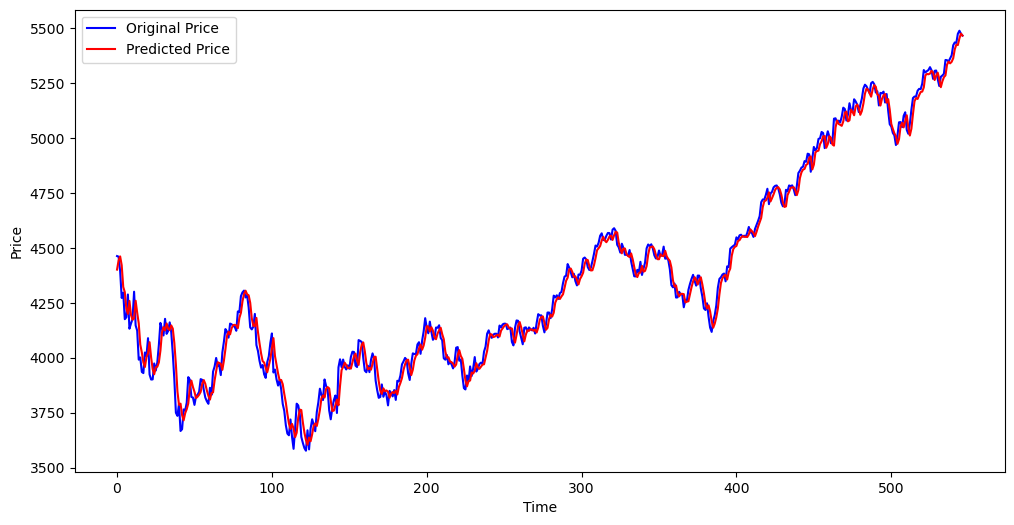

In [34]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()